In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import math

class LoopTrajectory:
    def __init__(self, viapoints, t_tot):
        """
        Initialize with an array of viapoints. Viapoints should be a Nx2 array.
        """
        self.viapoints = np.array(viapoints)
        # if the last and first viapoints does not match, append 
        if not np.allclose(self.viapoints[0], self.viapoints[-1]):
            self.viapoints = np.vstack([self.viapoints, self.viapoints[0]])
        self.t_tot = t_tot
        self.compute_spline(t_tot)
    
    def compute_spline(self, t_tot):
        """
        Compute cubic spline for the given viapoints.
        """
        t = np.linspace(0, t_tot, len(self.viapoints))
        self.spline_x = CubicSpline(t, self.viapoints[:, 0], bc_type='periodic')
        self.spline_y = CubicSpline(t, self.viapoints[:, 1], bc_type='periodic')
    
    def eval_trajectory(self, t):
        """
        Compute x, y, omega, x_dot, y_dot, omega_dot as a function of t.
        """
        x = self.spline_x(t)
        y = self.spline_y(t)
        x_dot = self.spline_x(t, 1)
        y_dot = self.spline_y(t, 1)

        theta = math.atan2(y_dot.item(0), x_dot.item(0))

        v = np.linalg.norm(np.array([x_dot,y_dot]))
        x_ddot = self.spline_x(t, 2)
        y_ddot = self.spline_y(t, 2)
        omega = (x_dot * y_ddot - y_dot * x_ddot) / (x_dot**2 + y_dot**2)
        v_dot = np.linalg.norm(np.array([x_ddot,y_ddot]))

        #TODO
        omega_dot = 0.

        return x, y, theta, v, omega, omega_dot, v_dot
    
    def plot_trajectory(self):
        """
        Plot the trajectory for visualization.
        """
        t = np.linspace(0, self.t_tot, 100)
        x, y, _ , _ , _, _, _ = self.eval_trajectory(t)
        
        plt.figure()
        plt.plot(x, y, label='Trajectory')
        plt.plot(self.viapoints[:, 0], self.viapoints[:, 1], 'ro', label='Points')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Closed Loop Trajectory')
        plt.grid()
        plt.show()

In [3]:
def generate_circle_viapoints(radius, num_points):
    # Generate angles evenly spaced around the circle
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    
    # Calculate x and y coordinates for each angle
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    
    # Combine x and y into a single array of shape (num_points, 2)
    viapoints = np.column_stack((x_coords, y_coords))
    
    return viapoints

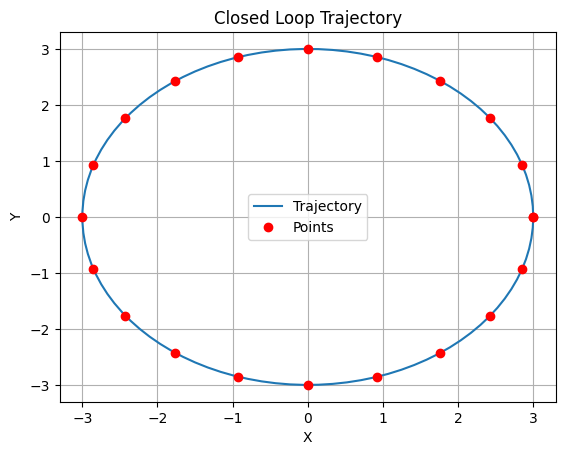

In [4]:
# Example usage:
# viapoints = np.array([[-4.5,  1.],
#                        [-2., -2.5],
#                        [-0.5, -3.5],
#                        [1.5, -2.5],
#                        [3.5,  1.],
#                        [2.5,  3.5],
#                        [1.,  4.5],
#                        [-0.5,  3.4],
#                        [-1.5,  2.5]])

viapoints = generate_circle_viapoints(3, 20)


t_tot = 10
trajectory = LoopTrajectory(viapoints, t_tot)
trajectory.plot_trajectory()

In [6]:
viapoints

array([[ 3.00000000e+00,  0.00000000e+00],
       [ 2.85316955e+00,  9.27050983e-01],
       [ 2.42705098e+00,  1.76335576e+00],
       [ 1.76335576e+00,  2.42705098e+00],
       [ 9.27050983e-01,  2.85316955e+00],
       [ 1.83697020e-16,  3.00000000e+00],
       [-9.27050983e-01,  2.85316955e+00],
       [-1.76335576e+00,  2.42705098e+00],
       [-2.42705098e+00,  1.76335576e+00],
       [-2.85316955e+00,  9.27050983e-01],
       [-3.00000000e+00,  3.67394040e-16],
       [-2.85316955e+00, -9.27050983e-01],
       [-2.42705098e+00, -1.76335576e+00],
       [-1.76335576e+00, -2.42705098e+00],
       [-9.27050983e-01, -2.85316955e+00],
       [-5.51091060e-16, -3.00000000e+00],
       [ 9.27050983e-01, -2.85316955e+00],
       [ 1.76335576e+00, -2.42705098e+00],
       [ 2.42705098e+00, -1.76335576e+00],
       [ 2.85316955e+00, -9.27050983e-01]])

In [5]:

# Compute trajectory values at specific time
t_values = np.linspace(0, t_tot, 10)
for t in t_values:
    x, y, theta, v, omega, v_dot, omega_dot = trajectory.eval_trajectory(t)
    print(f"t={t:.2f}: x={x:.2f}, y={y:.2f}, omega={theta:.2f}, v={v:.2f}, x_dot={omega:.2f}, y_dot={v_dot:.2f}, omega_dot={omega_dot:.2f}, v_dot={v_dot:.2f}")


t=0.00: x=3.00, y=0.00, omega=1.57, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.19, v_dot=0.00
t=1.11: x=2.30, y=1.93, omega=2.27, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=2.22: x=0.52, y=2.95, omega=2.97, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=3.33: x=-1.50, y=2.60, omega=-2.62, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=4.44: x=-2.82, y=1.03, omega=-1.92, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.19, v_dot=0.00
t=5.56: x=-2.82, y=-1.03, omega=-1.22, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.19, v_dot=0.00
t=6.67: x=-1.50, y=-2.60, omega=-0.52, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=7.78: x=0.52, y=-2.95, omega=0.17, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=8.89: x=2.30, y=-1.93, omega=0.87, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.18, v_dot=0.00
t=10.00: x=3.00, y=0.00, omega=1.57, v=1.88, x_dot=0.63, y_dot=0.00, omega_dot=1.19, v_dot=0.00
